In [1]:
import os
import numpy as np
import pandas as pd
from lr import LogisticRegression as LR
from data_util import getFeatureSKTime
from sklearn.model_selection import KFold
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# URL = http://timeseriesclassification.com/description.php?Dataset=UWaveGestureLibraryAll
#! unzip UWaveGestureLibraryAll.zip -d /home/karim/Interviews/Celonis/data

In [2]:
BASE_PATH = '/home/karim/Interviews/Celonis/data/'
TRAIN_PATH = BASE_PATH + "UWaveGestureLibraryAll_TRAIN.ts"
TEST_PATH = BASE_PATH + "UWaveGestureLibraryAll_TEST.ts"
X_train, y_train, X_test, y_test = getFeatureSKTime(TRAIN_PATH, TEST_PATH)

In [3]:
X_test.shape

(896, 945)

In [4]:
# Build logistic regression model
lr = LR()  # you can play with hyperparameters to understand how learning rate works.

In [5]:
lr.fit(X_train, y_train)

0.9782244556113903


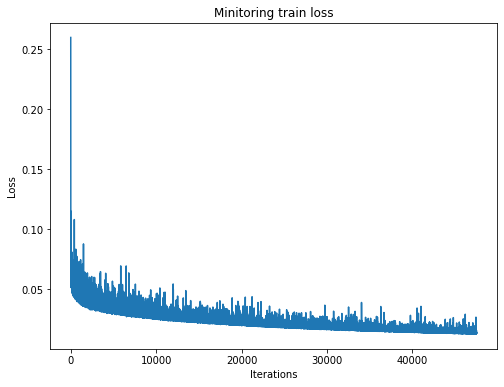

In [6]:
print(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Minitoring train loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

0.8348214285714286


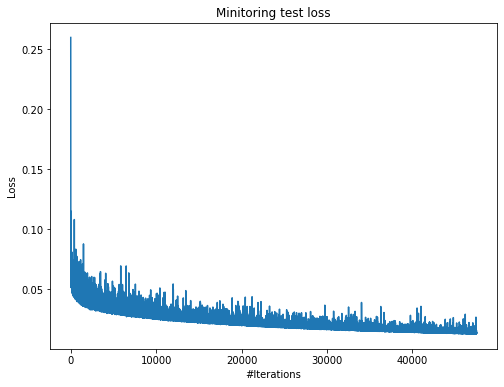

In [7]:
pre = lr.predict_classes(X_test)
print(lr.score(X_test, y_test))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Minitoring test loss")
plt.xlabel("#Iterations")
plt.ylabel("Loss")
plt.show()

In [8]:
tc = TimeSeriesForestClassifier()
tc.fit(X_train, y_train)
y_pred = tc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9776785714285714

In [10]:
lr = LogisticRegression(multi_class='multinomial', max_iter =50000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8179787828029034